## StableDiffusion 1.4 

In [1]:
from diffusers import UNet2DConditionModel, StableDiffusionPipeline
import torch


BASE_MODEL = "CompVis/stable-diffusion-v1-4"
BASE_PATH = "../scratch/unlearningbaselines/localscratch/damon2024/DM_baselines/ALL_baseline_ckpt/object"

def load_erased_model(object_name, method):
    
    original_model = StableDiffusionPipeline.from_pretrained(BASE_MODEL, safety_checker=None, feature_extractor=None)

    
    suffix = "-noxattn.pt" if method == "ESD" else ".pt"
    unet_path = f"{BASE_PATH}/{method}/{method}-{object_name}-Diffusers-UNet{suffix}"

    erased_model = StableDiffusionPipeline.from_pretrained(BASE_MODEL, safety_checker=None, feature_extractor=None)

    unet = UNet2DConditionModel.from_pretrained(BASE_MODEL, subfolder="unet")
    unet.load_state_dict(torch.load(unet_path))

    erased_model.unet = unet


    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    erased_model.to(device)
    original_model.to(device)
    
    return original_model, erased_model


object_name = "Tench"  
method = "ESD"         

original_model, erased_model = load_erased_model(object_name, method)


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
/tmp/ipykernel_346861/4055373374.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.m

  0%|          | 0/50 [00:00<?, ?it/s]

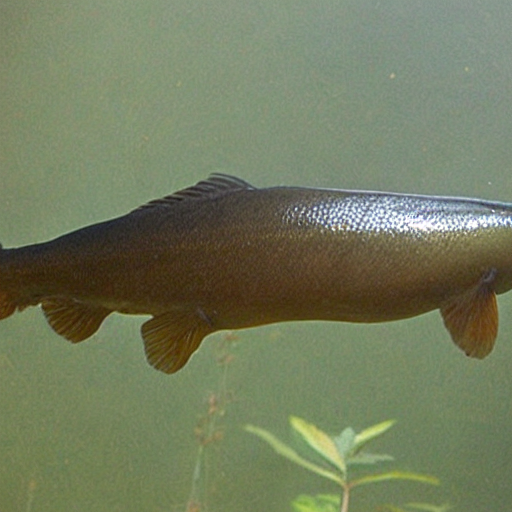

In [2]:
prompt = "Image of a Tench"

image = original_model(prompt).images[0]
image.show()

  0%|          | 0/50 [00:00<?, ?it/s]

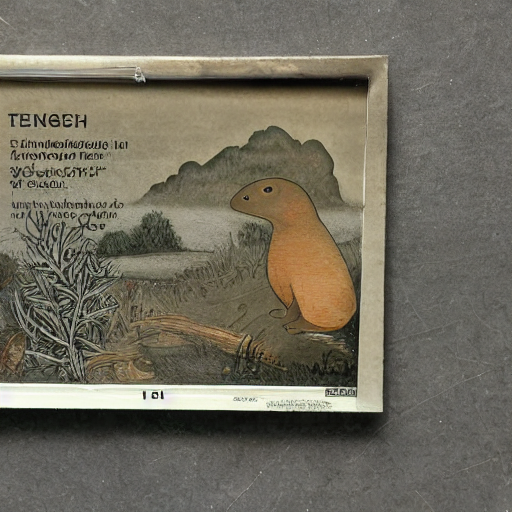

In [3]:
prompt = "Image of a Tench"

image = erased_model(prompt).images[0]
image.show()

## StableDiffusion 3.5

In [ ]:
import torch
from diffusers import StableDiffusion3Pipeline
import os
import matplotlib.pyplot as plt

home_dir = os.path.expanduser("~")
cache_dir = os.path.join(home_dir, "scratch/SD/") 
model = StableDiffusion3Pipeline.from_pretrained(
    "stabilityai/stable-diffusion-3.5-large",
    torch_dtype=torch.bfloat16,
    cache_dir=cache_dir,
    feature_extractor=None,
)

model = model.to("cuda")


Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

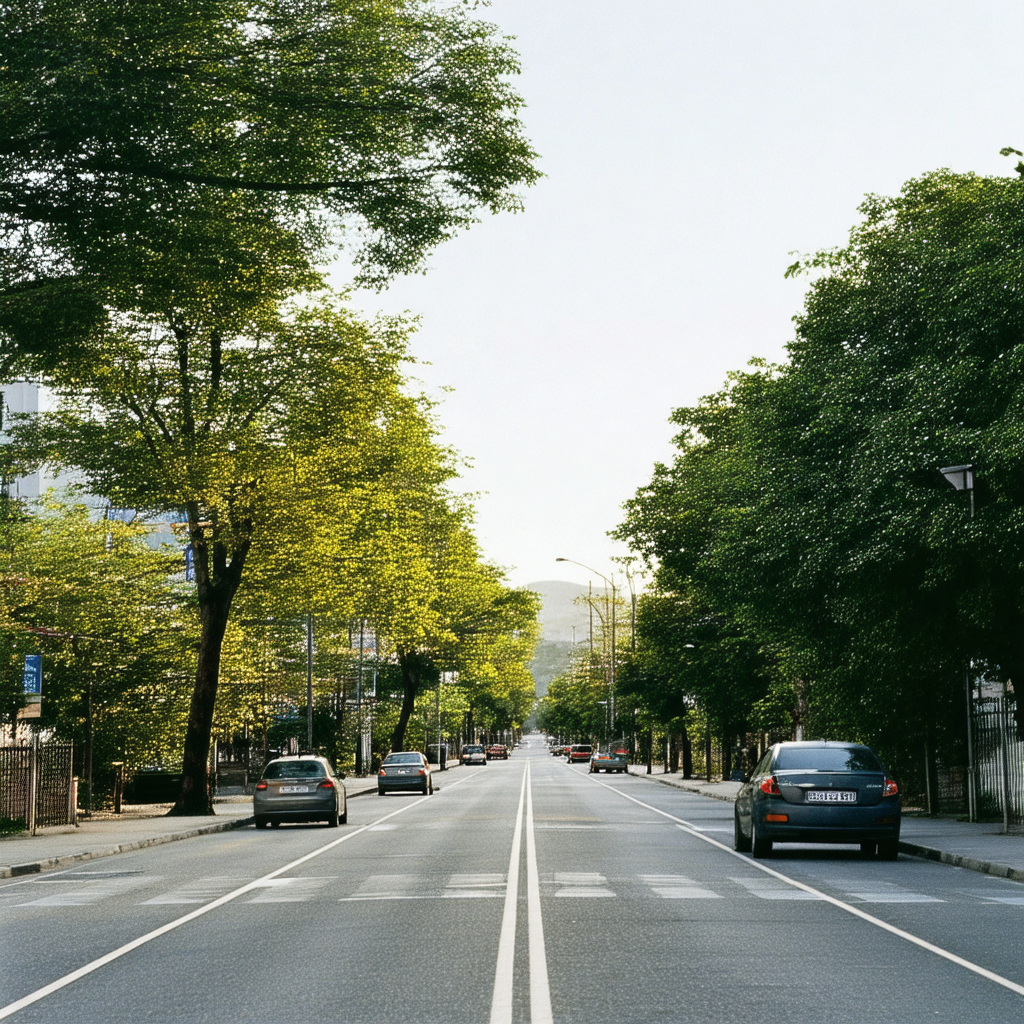

In [54]:
image = model("An street without cars in it").images[0]
image.show()
